In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pylab
from skimage.io import imread
from skimage import img_as_float
from sklearn import datasets
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn import preprocessing as prep
from sklearn import utils
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import r2_score, make_scorer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


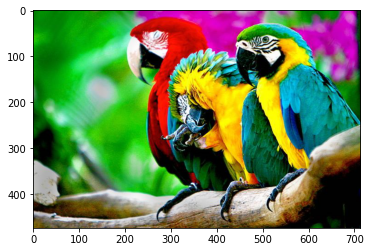

In [3]:
dataset_url = '/content/drive/My Drive/coursera/Week 6/Week_6_parrots.jpg'
image = imread(dataset_url)
pylab.imshow(image)

In [4]:
norm_image = img_as_float(image)
norm_image.shape

(474, 713, 3)

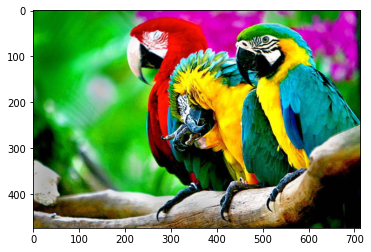

In [5]:
pylab.imshow(norm_image)

In [0]:
from sklearn.cluster import KMeans
from skimage.metrics import peak_signal_noise_ratio

In [0]:
X = np.array(image.reshape((image.shape[0]*image.shape[1],3)))
#norm_image.ravel().reshape(norm_image.shape[0]*norm_image.shape[1], 3)

In [9]:
for clusters in range(7, 25):
    kmeans = KMeans(init='k-means++', random_state=241, n_clusters=clusters)
    kmeans.fit(X)
    mean_X = np.array(X)
    median_X = np.array(X)
    labels_kmeans = kmeans.labels_
    for level in range(clusters):
        mean_X[labels_kmeans == level] = np.mean(mean_X[labels_kmeans == level], axis=0)
        median_X[labels_kmeans == level] = np.median(median_X[labels_kmeans == level], axis=0)
    image_mean = mean_X.reshape(image.shape[0], image.shape[1], 3)
    image_median = median_X.reshape(image.shape[0], image.shape[1], 3)
    print(f'n_clusters = {clusters} median(PSNR) = {peak_signal_noise_ratio(image, image_median):.3f}'
          f' mean(PSNR) = {peak_signal_noise_ratio(image, image_mean):.3f}')

n_clusters = 7 median(PSNR) = 17.336 mean(PSNR) = 17.639
n_clusters = 8 median(PSNR) = 18.137 mean(PSNR) = 18.435
n_clusters = 9 median(PSNR) = 18.816 mean(PSNR) = 19.111
n_clusters = 10 median(PSNR) = 19.414 mean(PSNR) = 19.638
n_clusters = 11 median(PSNR) = 19.844 mean(PSNR) = 20.125
n_clusters = 12 median(PSNR) = 20.306 mean(PSNR) = 20.590
n_clusters = 13 median(PSNR) = 20.792 mean(PSNR) = 21.019
n_clusters = 14 median(PSNR) = 21.124 mean(PSNR) = 21.325
n_clusters = 15 median(PSNR) = 21.404 mean(PSNR) = 21.603
n_clusters = 16 median(PSNR) = 21.644 mean(PSNR) = 21.856
n_clusters = 17 median(PSNR) = 21.924 mean(PSNR) = 22.116
n_clusters = 18 median(PSNR) = 22.127 mean(PSNR) = 22.332
n_clusters = 19 median(PSNR) = 22.332 mean(PSNR) = 22.527
n_clusters = 20 median(PSNR) = 22.570 mean(PSNR) = 22.720
n_clusters = 21 median(PSNR) = 22.728 mean(PSNR) = 22.897
n_clusters = 22 median(PSNR) = 22.864 mean(PSNR) = 23.035
n_clusters = 23 median(PSNR) = 23.020 mean(PSNR) = 23.194
n_clusters = 24 m